<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/fashion_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./fashion_scraping.xlsx')
grade_2 = text['star grade'] <= 2.0

df_grade2 = text[grade_2]
df_grade2['star grade'].value_counts()

df_grade2.head(10)

,star grade,review
98,1.0,설명에 17인치까지 가능하다고 하셨는데 15.6인치 노트북이 들어가지도 않습니다.\...
99,1.0,가방매고 걸어다니면 지퍼소리 쩌렁쩌렁 울립니다. 지금까지 가방 매고 다니면서 이렇게...
113,1.0,가방 받았는데 가볍습니다.\n근데 마감이 너무 엉망입니다.\n폴리로된 안감이 너덜하...
114,1.5,가방이 찢어졌는데요?????\n좀 두꺼운 책 넣자마자다른칸 내부 천이 찢어지면서 안...
115,2.0,지퍼 소리가....ㅠㅠ 가방 가벼워서 좋아했고 선물도 했는데 움직일때마다 너무 심해...
118,2.0,1. 리워드 만족도\n가성비가 우수하다. 하지만 아쉽게도 지퍼부분에 문제가 있어 현...
155,1.0,사진 추가가 안되는군요!! 아쉽네요!!\n일단 펀딩으로 좋은 제품을 구입할수 있어서...
161,1.0,메고 다닐 수 있는 가방을 만들어 주셨으면 하네요..\n\n가방을 메고 다니면 아기...
173,1.0,17인치까지 들어간다고 해서 샀는데 15인치 제 노트북은 들어가지도 않네요. 우겨넣...
222,1.0,새제품에 하얀이물에 파인 훼손이 있어 실망스럽네요


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5877,), (5877,), (1959,), (1959,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  29271      0 --:--:-- --:--:-- --:--:-- 29271


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

4951    아치서포트 전혀 느낌이 안오네요부피도 커서 일반 신발운동화포함에는 사용이 곤란해 작...
2388                                              그래도 좋아요
6329    너무이뻐요 그리고 일단 도 애매하고 도 애매한 발을 가지고있는데 기능성화라 시켰더니...
1247    혼자 끙끙대고 있었어요 이걸 문제제기를 해야할지 그래도 솔직한 평을 남기는게 개발자...
4124    어제 흰둥이 흰둥이 검둥이 총 켤레 신발을 받았습니다정말질감이나 색감이 너무너무 마...
                              ...                        
6630    첫 펀딩 후 너무 만족하고 두번째 펀딩 참여해서 저희 어머니와 동생에까지 전파 했습...
956                                            줄이 자꾸 꼬입니다
3185    만족도 최악입니다 비오는날 신어야 하는건데 미끄러워 비오는날 신지 말아야할 아이템으...
918     재질도 좋고 품질이나 마감도 좋았습니다근데 사이즈미스나서ㅠㅠ더블라이더 라지로 교환하...
7820    와 미쳤다 내가 지금껏 이렇게 구속되어 산게 억울합니다 집에서 정말 너무 힘든데 그...
Name: review, Length: 5877, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['아치',
  '서포트',
  '전혀',
  '느낌',
  '네요',
  '부피',
  '도',
  '커서',
  '일반',
  '신발',
  '(',
  '운동',
  '화',
  '포함',
  ')',
  '사용',
  '곤란',
  '해',
  '작업',
  '화',
  '만',
  '사용',
  '입니다',
  '.',
  '괜히',
  '여러',
  '펀딩',
  '했',
  '네요',
  '.',
  '..'],
 ['그래도', '아요', '~!!!'],
 ['너무',
  '이뻐요',
  '!',
  '!!!',
  '일단',
  '255',
  '도',
  '애매',
  '고',
  '260',
  '도',
  '애매',
  '발',
  '을',
  '고',
  '는데',
  '기능',
  '성',
  '화라',
  '260',
  '시',
  '켰',
  '더니',
  '딱',
  '네요',
  '!',
  '!!',
  '보통',
  '남녀',
  '공용',
  '255',
  '신',
  '기도',
  '260',
  '길',
  '이감',
  '도',
  '고',
  '발',
  '도',
  '편안',
  '게',
  '감싸',
  '거',
  '아요',
  '.',
  '펀딩',
  '면서',
  '도',
  '신',
  '어',
  '봐야',
  '거',
  '아서',
  '사이즈',
  '변경',
  '할',
  '조금',
  '귀찮',
  '았었',
  '는데',
  '.',
  '..',
  '한방',
  '성공',
  '해서',
  '너무너무',
  '신',
  '나요',
  '!',
  '이제',
  '비',
  '도',
  '그치',
  '고',
  '주말',
  '캠핑',
  '신',
  '고',
  '갈',
  '꺼',
  '에요',
  '~~~',
  '얏호',
  '빨리',
  '보내',
  '셔서',
  '너무너무',
  '감사',
  '합니다',
  '지난번',
  '펀딩',
  '에서',
  '고민',
  '고

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
text = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='gray',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)

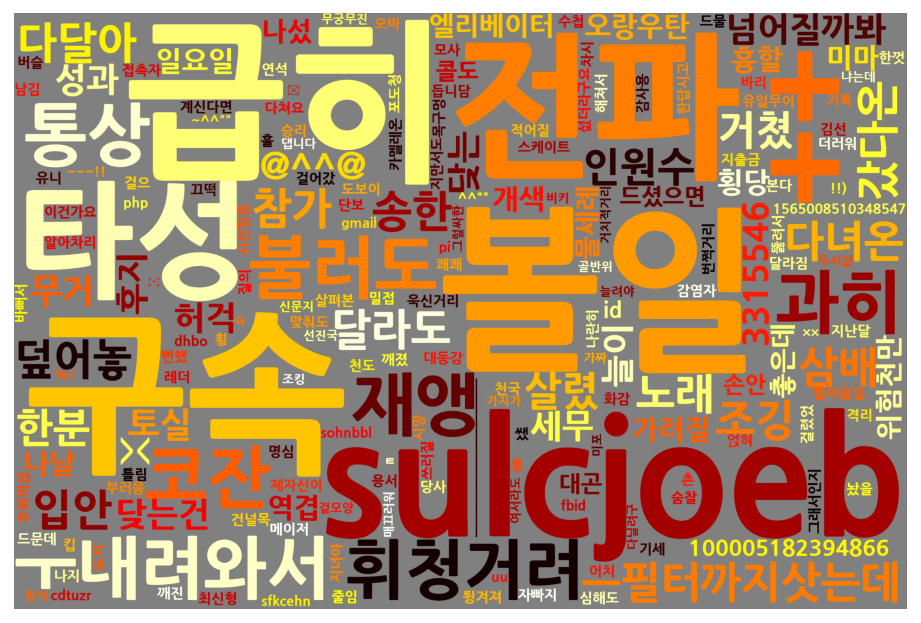

In [ ]:
plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()